In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
imgs_path = ['../../../ssl-dataset-master/1_resized/{:05d}.jpg'.format(i) for i in range(591, 658 + 1)]

'\nfig, ax = plt.subplots(1, 3)\nax[0].imshow(im[:, :, 0])\nax[1].imshow(im[:, :, 1])\nax[2].imshow(im[:, :, 2])\n'

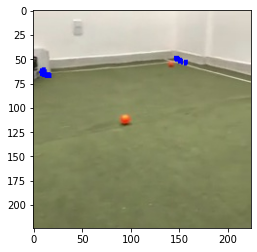

In [85]:
im = cv2.imread(imgs_path[0])
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)                  

hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
mask_green = cv2.inRange(hsv, (20, 60, 60), (60, 255, 255)) # green mask to select only the field
hsv_masked = cv2.bitwise_and(hsv, hsv, mask=mask_green)

gray = cv2.cvtColor(hsv_masked, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

canny = cv2.Canny(gray, 50, 100, apertureSize=3)
cdst = np.zeros(im.shape, np.uint8)

lines = cv2.HoughLinesP(canny, 1, 0.5 * np.pi / 180, 50, None, 40, 200)

if lines is not None:
    for i in range(0, len(lines)):
        l = lines[i][0]
        cv2.line(cdst, (l[0], l[1]), (l[2], l[3]), 255, 2, cv2.LINE_AA)

#lsd = cv2.createLineSegmentDetector(0)
dst = cv2.cornerHarris(cv2.cvtColor(cdst, cv2.COLOR_BGR2GRAY), 6, 3, 0.01)        

im_rgb[dst > 0.01 * dst.max()] = [0, 0, 255]

#plt.imshow(dst)
plt.imshow(im_rgb)
"""
fig, ax = plt.subplots(1, 3)
ax[0].imshow(im[:, :, 0])
ax[1].imshow(im[:, :, 1])
ax[2].imshow(im[:, :, 2])
"""

In [83]:
lines

array([[[-2.3021536e+20,  3.7219529e+00]]], dtype=float32)

In [31]:
dst

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)